In [1]:
import import_ipynb
import os
from select_folders import FolderSelector
from under_sampling import apply_undersampling
import time
import matplotlib.pyplot as plt
import random
from glob import glob

In [2]:
folder_selector = FolderSelector()
folder_selector.afficher()

In [3]:
while not folder_selector.fini:
    time.sleep(1)

# On récupère les dossiers sélectionnés
selected_dirs = folder_selector.chemins
print(f"Dossiers sélectionnés : {selected_dirs}")

Dossiers sélectionnés : ['C:\\Users\\steve\\Documents\\data_scientest\\DS_COVID\\data\\raw\\COVID-19_Radiography_Dataset\\COVID-19_Radiography_Dataset\\Normal\\images']


In [4]:
target_count = 4999
# Récupère le chemin absolu du dossier courant du projet (là où se trouve ce notebook)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

# Construit le chemin de sortie de façon portable
output_dir = os.path.join(project_root, "data", "processed", "Normal")
print("Chemin de sortie utilisé :", output_dir)

for data_dir in selected_dirs:
    print(f"🔁 Traitement du dossier : {data_dir}")
    logs = apply_undersampling(data_dir, target_count, output_dir)
    for line in logs:
        print(line)

Chemin de sortie utilisé : c:\Users\steve\Documents\data_scientest\DS_COVID\data\processed\Normal
🔁 Traitement du dossier : C:\Users\steve\Documents\data_scientest\DS_COVID\data\raw\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images
Recherche dans : C:\Users\steve\Documents\data_scientest\DS_COVID\data\raw\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images
Images trouvées : 10192
✅ Undersampling terminé pour C:\Users\steve\Documents\data_scientest\DS_COVID\data\raw\COVID-19_Radiography_Dataset\COVID-19_Radiography_Dataset\Normal\images → c:\Users\steve\Documents\data_scientest\DS_COVID\data\processed\Normal


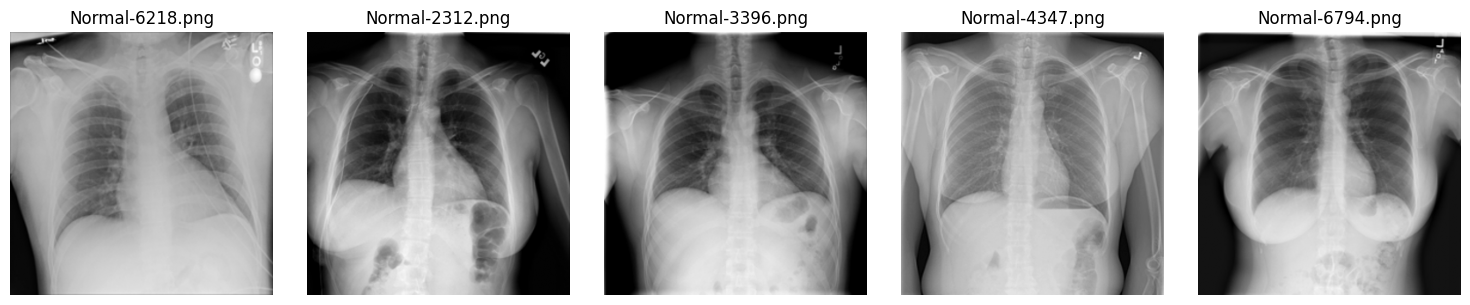

In [5]:
# Choisir le dossier à explorer
data_dir = selected_dirs[0]

images = glob(os.path.join(output_dir, '*.png'))
sample_images = random.sample(images, min(5, len(images)))

fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 3))
if len(sample_images) == 1:
    axes = [axes]
for ax, img_path in zip(axes, sample_images):
    img = plt.imread(img_path)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(os.path.basename(img_path))
plt.tight_layout()
plt.show()